In [1]:
import stk
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import nglview
from rdkit.Chem import TorsionFingerprints
import numpy as np

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol


ModuleNotFoundError: No module named 'stk'

In [4]:

# file = Path.cwd().parent / 'molecules' / 'xor_gate_8' / 'XORgateNo8.mol'
# file = Path.cwd().parent / 'molecules' / 'xor3_gate_6' / 'XOR3gate6.mol'
# file = Path.home() / 'conformer-ml' / 'debug_silly.mol'
file = Path.home() / 'conformer-ml' / 'debug.mol'
# file = Path.home() / 'conformer-ml' / 'molecules' / 'two_lignin' / '2_lignin_ex.mol'
# file = Path.home() / 'conformer-ml' / 'polymer.mol'
mol = Chem.MolFromMolFile(str(file))
# nonring, ring = TorsionFingerprints.CalculateTorsionLists(mol)
# rng = np.random.default_rng()
# for tor in nonring:
#     ang = 360 * rng.random() - 180
#     # print(tor[0][0])
#     Chem.rdMolTransforms.SetDihedralDeg(mol.GetConformer(id=0), *(tor[0][0]), ang)
# # mol = Chem.rdmolops.AddHs(mol, addCoords=True)
# AllChem.MMFFOptimizeMolecule(mol, confId=0, maxIters=20000)
# Chem.rdMolTransforms.SetDihedralDeg(mol.GetConformer(id=0),5,12,14,15, 180.0)

# display(Draw.MolToImage(mol_with_atom_index(mol),size=(900,900)))
# mol = Chem.MolFromSmiles('CC(=O)c1ccc(C(C)=O)c2c(C(C)=O)c3c(C(C)=O)c4cc5cc6c(C(C)=O)c7c(C(C)=O)c8c(C(C)=O)c9cc%10cc%11c(C(C)=O)c%12c(C(C)=O)c%13c(C(C)=O)ccc(C(C)=O)c%13c(C(C)=O)c%12c(C(C)=O)c%11cc%10cc9c(C(C)=O)c8c(C(C)=O)c7c(C(C)=O)c6cc5cc4c(C(C)=O)c3c(C(C)=O)c12')
# mol = Chem.MolFromSmiles('CC(=O)c1cccc2cccc(C(C)=O)c12')
# mol = Chem.MolFromSmiles('c')
# print(Chem.MolToSmiles(mol))
# Chem.Draw.MolToImage(mol)
nglview.show_rdkit(mol)

NGLWidget()

[[4, 5, 10, 13], [4, 6, 11, 15]]


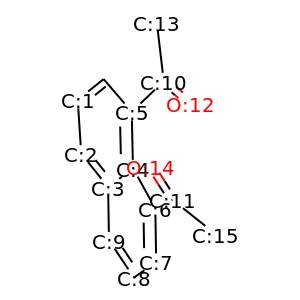

In [3]:
file = Path.cwd().parent / 'molecules' / 'xor_gate_cache' / 'XORgateNo.mol'
mol = Chem.MolFromMolFile(str(file))
AllChem.MMFFOptimizeMolecule(mol, confId=0, maxIters=20000)

nonring, ring = TorsionFingerprints.CalculateTorsionLists(mol)
nonring = [list(atoms[0]) for atoms, ang in nonring]


print(nonring)
Chem.rdMolTransforms.SetDihedralDeg(mol.GetConformer(id=0),0,5,10,12, 180.0)
display(Draw.MolToImage(mol_with_atom_index(mol),size=(300,300)))

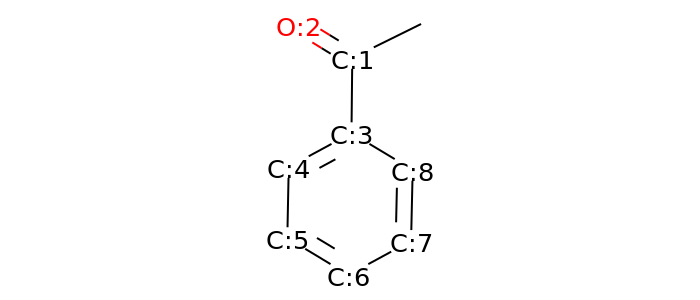

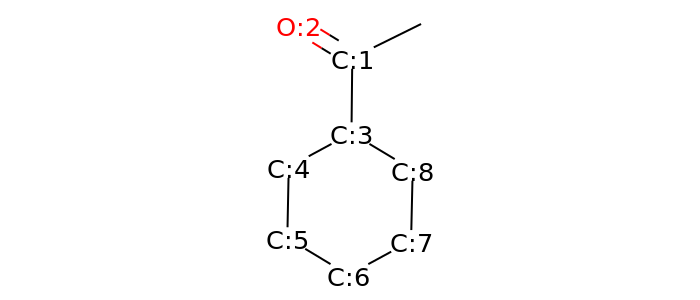

/home/joshkamm/conformer-ml/notebooks
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 2. 1. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]


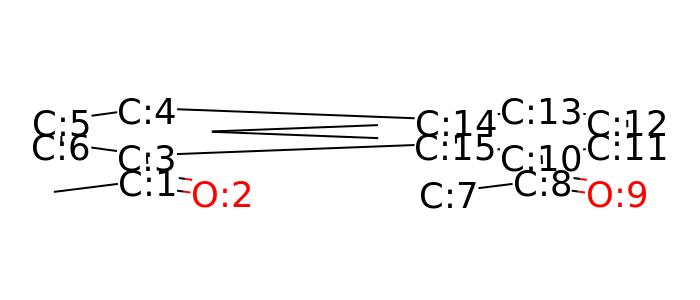

NGLWidget()

In [5]:
file = Path.cwd().parent / 'molecules' / 'xor_gate_cache' / 'XORBuildingBlock.mol'
mol = Chem.MolFromMolFile(str(file))
mol = Chem.rdmolops.RemoveHs(mol)
AllChem.MMFFOptimizeMolecule(mol, confId=0, maxIters=20000)
display(Draw.MolToImage(mol_with_atom_index(mol),size=(700,300)))

# building_block = stk.BuildingBlock('BrCCBr', [stk.BromoFactory()])
c_0, c_1, c_2, c_3, c_4, c_5 = stk.C(6), stk.C(7), stk.C(8), stk.C(3), stk.C(5), stk.C(4)
functional_groups = [stk.GenericFunctionalGroup(atoms=(c_0, c_1, c_2, c_3, c_4, c_5),
                                                bonders=(c_1, c_2), deleters=()),
                     stk.GenericFunctionalGroup(atoms=(c_0, c_1, c_2, c_3, c_4, c_5),
                                                bonders=(c_0, c_3), deleters=(c_4, c_5))]
building_block = stk.BuildingBlock.init_from_rdkit_mol(mol, functional_groups=functional_groups)
display(Draw.MolToImage(mol_with_atom_index(mol),size=(700,300)))
# building_block = stk.BuildingBlock.init_from_file(str(file), functional_groups=functional_groups)
reaction = stk.molecular.factories.GenericReactionFactory(
    bond_orders= {frozenset({stk.GenericFunctionalGroup}): 2}
)
polymer = stk.ConstructedMolecule(
    topology_graph=stk.polymer.Linear(
        building_blocks=(building_block,),
        repeating_unit='A',
        num_repeating_units=2,
        reaction_factory=reaction
        # orientations=(0,1)
    )
)
print(Path.cwd())
polymer.write('polymer.mol')
print(Chem.rdmolops.GetAdjacencyMatrix(mol, useBO=True))
mol = polymer.to_rdkit_mol()
# mol = Chem.rdmolops.AddHs(mol, addCoords=True)
# AllChem.SanitizeMol(mol)
# AllChem.MMFFOptimizeMolecule(mol, confId=0)
# JOSH - RESUME HERE - try passing smiles

display(Draw.MolToImage(mol_with_atom_index(mol),size=(700,300)))
nglview.show_rdkit(mol)

In [9]:
# Stuff from working with Troy

mol = Chem.MolFromSmiles('C=C')
mol = Chem.rdmolops.AddHs(mol)
print(Chem.MolToSmiles(mol))
print(Chem.rdmolops.GetAdjacencyMatrix(mol,useBO=False))
# mol = mol.add
# nglview.show_rdkit(mol)

[H]C([H])=C([H])[H]
[[0 1 1 1 0 0]
 [1 0 0 0 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [3]:
import ipywidgets as ipw
from ipywidgets import interact
from rdkit import Chem
from rdkit.Chem import AllChem
import nglview as nv
import py3Dmol
from pathlib import Path
print("Hello world")

Hello world


In [8]:
# eval, ep and step is hard coded here. Feel free to change those to what actually fit the specification.
path = Path.home() / 'ConformerML' / 'conformer-ml' / 'log'

@interact(eval=(2), ep=(0, 1), step=(0, 199))
def show_mol(eval, ep, step):
    file = path / ('mol_eval/eval' + str(eval) + '/ep' + str(ep) + '/step' + str(step) + '.mol')
    print(file)
    mol = Chem.MolFromMolFile(str(file))
    m = Chem.MolToMolBlock(mol)
    p = py3Dmol.view(width=600, height=600)
    p.removeAllModels()
    p.addModel(m)
    p.setStyle({'stick':{}})
    p.zoomTo()
    # p.show()
    display(nv.show_rdkit(mol))

interactive(children=(IntSlider(value=2, description='eval', max=6, min=-2), IntSlider(value=0, description='e…